<a href="https://colab.research.google.com/github/fschneider2/Final_module_estatistic_II/blob/main/Final_MATEM%C3%81TICA_E_ESTAT%C3%8DSTICA_II_Fernando_Schneider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Análise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic.

## Lendo arquivo

In [41]:
data = pd.read_csv('/content/drive/MyDrive/titanic.csv')

data = data[['Sex', 'Survived']]


### A) Monte a tabela cruzada de sex e survived

In [42]:
sex = data['Sex']

survived = data['Survived']

cross_table = pd.crosstab(sex,survived).reset_index()

cross_table.rename(columns = {0:'Dead',1:'Alive'}, inplace = True)

cross_table = cross_table.rename_axis(None, axis=1)

cross_table

,Sex,Dead,Alive
0,female,81,233
1,male,468,109


###B) Apresente o gráfico de colunas dessa tabela cruzada

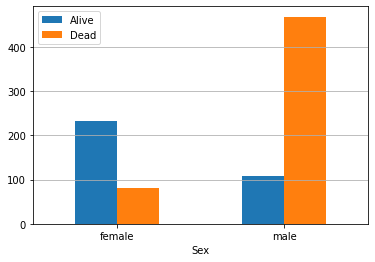

In [25]:
alive = list(cross_table.Alive)
dead = list(cross_table.Dead)
x_axis = cross_table['Sex']
config_grafic = pd.DataFrame({'Alive': alive,'Dead': dead}, index= x_axis)
grafic = config_grafic.plot.bar(rot=0)
plt.grid(axis = 'y')

###C) Realize um teste qui quadrado para essas duas variáveis. Apresente as hipóteses, o valor de qui quadrado e a conclusão.

In [69]:
h0 = 'Não existe relação entre a quantidade de sobreviventes e o sexo do passageiro.'

h1 = 'Existe relação entre a quantidade de sobreviventes e o sexo do passageiro.'

In [70]:
info = np.array([[81,233],[468,109]])

In [71]:
test_χ2 = chi2_contingency(info)

In [72]:
print(f'Hipóteses:\nH0 {h0}\nH1 {h1}\n')

print(f'O valor do qui-quadrado(χ2) é: {round(test_χ2[0],2)}.\n')

if test_χ2[1] < 0.05: 
    print(f'Com base no teste de qui-quadrado(χ2),\nrejeitamos o H0 e concluimos que {h1}')
else:
    print(f'Com base no teste de qui-quadrado(χ2),\naceitamos o H0 e concluimos que {h0}')

Hipóteses:
H0 Não existe relação entre a quantidade de sobreviventes e o sexo do passageiro.
H1 Existe relação entre a quantidade de sobreviventes e o sexo do passageiro.

O valor do qui-quadrado(χ2) é: 260.72.

Com base no teste de qui-quadrado(χ2),
rejeitamos o H0 e concluimos que Existe relação entre a quantidade de sobreviventes e o sexo do passageiro.
